# [영어 감성 분석 실습: 영어 전처리]


### jupyter notebook 단축키

- ctrl+enter: 셀 실행   
- shift+enter: 셀 실행 및 다음 셀 이동   
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)
- y: Code로 변경
- m: Markdown으로 변경

## 1. 모듈 불러오기

#### import '불러올 패키지명' as '그 패키지를 파이썬에서 사용할 이름'

In [1]:
# Data preprocessing
import konlpy
from konlpy.tag import Hannanum, Kkma, Komoran

import nltk
from nltk.tokenize import word_tokenize
#nltk.download()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Document representation 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Document classifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Classifier measure
from sklearn.metrics import accuracy_score

import re
import sys
import os
import time
import random
import pandas as pd
import numpy as np

## 2. 데이터 불러오기: English Movie Review Data

#### 데이터 구조
- 데이터: 영어 영화 리뷰 데이터  
- 관측치 건수: 2000건
- 변수 개수: 설명변수 1개 / 반응변수 1개

#### 설명 변수(원인: 예측값을 설명할 수 있는 변수)      
- review: 영화 리뷰 데이터(Document)


#### 반응 변수(결과: 예측하고자 하는 값)
- sentiment: 리뷰의 감정 (긍정:1/ 부정:-1)

In [2]:
train_data = pd.read_csv('data/english_train.csv',encoding='utf-8', engine='python', index_col=0)
test_data = pd.read_csv('data/english_test.csv', encoding='utf-8', engine='python',index_col=0)

## 3. 데이터 구성

### - 3.1 train 데이터 및 test 데이터 갯수 확인

In [3]:
print('DATA COLUMNS NAMES: {}'.format()))
print('\n')
print('TRAIN DATA SHAPE: {}'.format())
print('TEST  DATA SHAPE: {}'.format())

DATA COLUMNS NAMES: ['reviews', 'sentiment']


TRAIN DATA SHAPE: (1800, 2)
TEST  DATA SHAPE: (200, 2)


### - 3.2 train/test 데이터 병합

In [4]:
whole_data = 

In [5]:
whole_data.head() #.head(): 상위 5개 예시

,reviews,sentiment
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you've got mail works alot better than it dese...,1
3,""" jaws "" is a rare film that grabs your atten...",1
4,moviemaking is a lot like being the general ma...,1


## 4. 데이터 텍스트 전처리

### - 4.1 데이터 기호 및 문법 정규화

https://python.bakyeono.net/chapter-11-2.html

#### re모듈은 패턴과 매치하는 텍스트를 찾고 조각하는 기능 제공

- re.compile(pattern)            : 패턴 문자열 pattern을 패턴 객체로 컴파일한다.   
- re.search(pattern, string)     : string에서 pattern과 매치하는 텍스트를 탐색한다. (임의 지점 매치)
- re.match(pattern, string)      : string에서 pattern과 매치하는 텍스트를 탐색한다. (시작점 매치)
- re.fullmatch(pattern, string)  : string에서 pattern과 매치하는 텍스트를 탐색한다. (전체 매치)
- re.sub(pattern, replacd, string)  : string에서 pattern과 매치하는 텍스트를 repl로 치환한다.
- re.split(pattern, string)	     : string을 pattern을 기준으로 나눈다.


In [6]:
# re.sub(pattern, replacd, string) example
re.sub("-","0","991225-1234567")

'99122501234567'

In [7]:
docs_tr = [re.sub(r"\%\$ ?\([^)]+\)-", "", x) for x in whole_data.reviews.values.tolist()]
docs_tr = [re.sub("\'", " ", x) for x in docs_tr]
docs_tr = [re.sub('\S*@\S*\s?', '', x) for x in docs_tr]
docs_tr = [re.sub('\s+', ' ', x) for x in docs_tr]
docs_tr = [re.sub('[^\w\s]','',x) for x in docs_tr]

In [8]:
# Original data
pd.DataFrame(whole_data.reviews.head())

,reviews
0,films adapted from comic books have had plenty...
1,every now and then a movie comes along from a ...
2,you've got mail works alot better than it dese...
3,""" jaws "" is a rare film that grabs your atten..."
4,moviemaking is a lot like being the general ma...


In [9]:
# Preprocessed data
pd.DataFrame(docs_tr, columns = ['preprocessed_reviews']).head()

,preprocessed_reviews
0,films adapted from comic books have had plenty...
1,every now and then a movie comes along from a ...
2,you ve got mail works alot better than it dese...
3,jaws is a rare film that grabs your attenti...
4,moviemaking is a lot like being the general ma...


In [10]:
whole_data.reviews = docs_tr

In [11]:
whole_data.head()

,reviews,sentiment
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you ve got mail works alot better than it dese...,1
3,jaws is a rare film that grabs your attenti...,1
4,moviemaking is a lot like being the general ma...,1


## 5. 토큰화 전처리

### - 5.1 토큰화

In [12]:
nltk.download('punkt')
docs_tr = [word_tokenize(review) for review in ]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiyoon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# 토큰화 결과
docs_tr[0]

['films',
 'adapted',
 'from',
 'comic',
 'books',
 'have',
 'had',
 'plenty',
 'of',
 'success',
 'whether',
 'they',
 're',
 'about',
 'superheroes',
 'batman',
 'superman',
 'spawn',
 'or',
 'geared',
 'toward',
 'kids',
 'casper',
 'or',
 'the',
 'arthouse',
 'crowd',
 'ghost',
 'world',
 'but',
 'there',
 's',
 'never',
 'really',
 'been',
 'a',
 'comic',
 'book',
 'like',
 'from',
 'hell',
 'before',
 'for',
 'starters',
 'it',
 'was',
 'created',
 'by',
 'alan',
 'moore',
 'and',
 'eddie',
 'campbell',
 'who',
 'brought',
 'the',
 'medium',
 'to',
 'a',
 'whole',
 'new',
 'level',
 'in',
 'the',
 'mid',
 '80s',
 'with',
 'a',
 '12part',
 'series',
 'called',
 'the',
 'watchmen',
 'to',
 'say',
 'moore',
 'and',
 'campbell',
 'thoroughly',
 'researched',
 'the',
 'subject',
 'of',
 'jack',
 'the',
 'ripper',
 'would',
 'be',
 'like',
 'saying',
 'michael',
 'jackson',
 'is',
 'starting',
 'to',
 'look',
 'a',
 'little',
 'odd',
 'the',
 'book',
 'or',
 'graphic',
 'novel',
 'if',

### - 5.2 lemmatization

In [14]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemm_docs_tr = [[lemmatizer.lemmatize(word) for word in doc] for doc in docs_tr]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jiyoon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
# lemmatization 결과
lemm_docs_tr[0]

['film',
 'adapted',
 'from',
 'comic',
 'book',
 'have',
 'had',
 'plenty',
 'of',
 'success',
 'whether',
 'they',
 're',
 'about',
 'superheroes',
 'batman',
 'superman',
 'spawn',
 'or',
 'geared',
 'toward',
 'kid',
 'casper',
 'or',
 'the',
 'arthouse',
 'crowd',
 'ghost',
 'world',
 'but',
 'there',
 's',
 'never',
 'really',
 'been',
 'a',
 'comic',
 'book',
 'like',
 'from',
 'hell',
 'before',
 'for',
 'starter',
 'it',
 'wa',
 'created',
 'by',
 'alan',
 'moore',
 'and',
 'eddie',
 'campbell',
 'who',
 'brought',
 'the',
 'medium',
 'to',
 'a',
 'whole',
 'new',
 'level',
 'in',
 'the',
 'mid',
 '80',
 'with',
 'a',
 '12part',
 'series',
 'called',
 'the',
 'watchman',
 'to',
 'say',
 'moore',
 'and',
 'campbell',
 'thoroughly',
 'researched',
 'the',
 'subject',
 'of',
 'jack',
 'the',
 'ripper',
 'would',
 'be',
 'like',
 'saying',
 'michael',
 'jackson',
 'is',
 'starting',
 'to',
 'look',
 'a',
 'little',
 'odd',
 'the',
 'book',
 'or',
 'graphic',
 'novel',
 'if',
 'you

### - 5.3 delete stop words 

In [16]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
filtered_docs = [[w for w in doc if not w in stop_words] for doc in lemm_docs_tr]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiyoon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# delete stop words 결과
filtered_docs[0]

['film',
 'adapted',
 'comic',
 'book',
 'plenty',
 'success',
 'whether',
 'superheroes',
 'batman',
 'superman',
 'spawn',
 'geared',
 'toward',
 'kid',
 'casper',
 'arthouse',
 'crowd',
 'ghost',
 'world',
 'never',
 'really',
 'comic',
 'book',
 'like',
 'hell',
 'starter',
 'wa',
 'created',
 'alan',
 'moore',
 'eddie',
 'campbell',
 'brought',
 'medium',
 'whole',
 'new',
 'level',
 'mid',
 '80',
 '12part',
 'series',
 'called',
 'watchman',
 'say',
 'moore',
 'campbell',
 'thoroughly',
 'researched',
 'subject',
 'jack',
 'ripper',
 'would',
 'like',
 'saying',
 'michael',
 'jackson',
 'starting',
 'look',
 'little',
 'odd',
 'book',
 'graphic',
 'novel',
 '500',
 'page',
 'long',
 'includes',
 'nearly',
 '30',
 'consist',
 'nothing',
 'footnote',
 'word',
 'dismiss',
 'film',
 'source',
 'get',
 'past',
 'whole',
 'comic',
 'book',
 'thing',
 'might',
 'find',
 'another',
 'stumbling',
 'block',
 'hell',
 'director',
 'albert',
 'allen',
 'hughes',
 'getting',
 'hughes',
 'brot

In [18]:
whole_data.reviews = filtered_docs

### - 5.4 전처리 결과

In [19]:
whole_data.head()

,reviews,sentiment
0,"[film, adapted, comic, book, plenty, success, ...",1
1,"[every, movie, come, along, suspect, studio, e...",1
2,"[got, mail, work, alot, better, deserves, orde...",1
3,"[jaw, rare, film, grab, attention, show, singl...",1
4,"[moviemaking, lot, like, general, manager, nfl...",1


## 6. 토큰화 데이터 탐색

### - 6.1 전체 문서에 대한 토큰 생성

### - 6.2 nltk 객체 생성

### - 6.3 중복을 제외한 토큰의 수 

41166


### - 6.4 전체 문서에서 가장 많이 나온 토큰 10개 확인

[('film', 10963), ('movie', 6854), ('one', 5756), ('wa', 4935), ('ha', 4747), ('character', 3853), ('like', 3651), ('time', 2849), ('get', 2785), ('scene', 2638)]


### - 6.5 전체 문서에서 가장 많이 나온 토큰  visualization

C:\Users\jiyoon\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


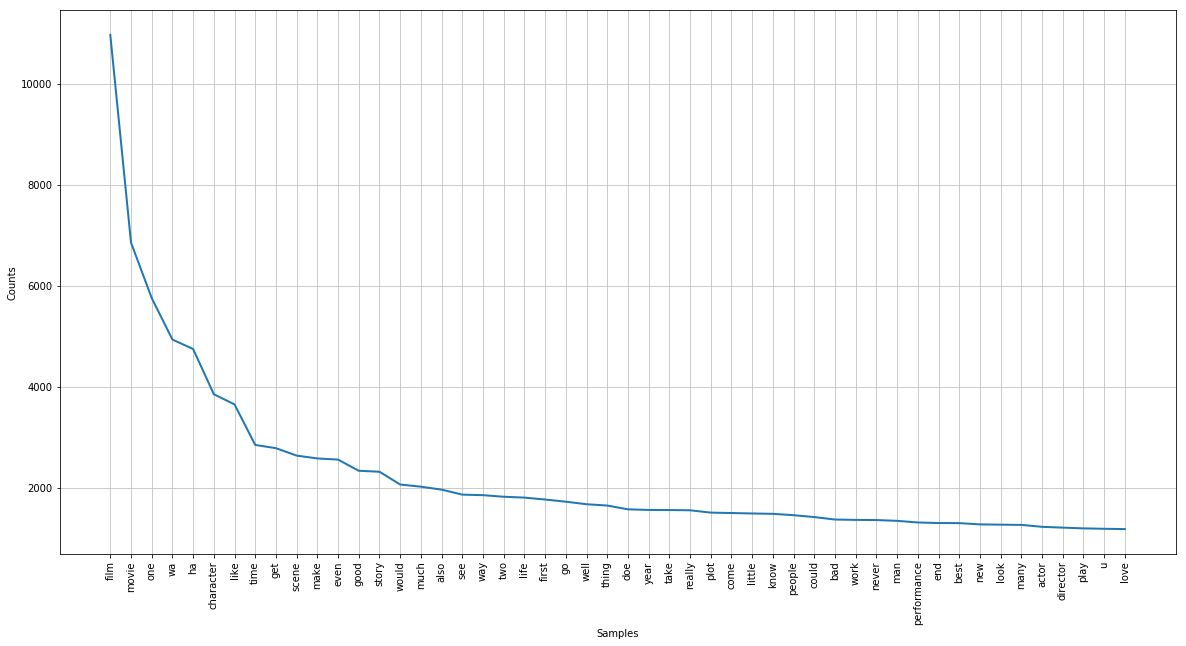

In [24]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_manager.get_fontconfig_fonts()

font_fname = 'C:/Users/jiyoon/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf'
#font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'

font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

In [25]:
train_docs = whole_data.reviews.values.tolist()[:len(train_data)]
test_docs  = whole_data.reviews.values.tolist()[-len(test_data):]